# 05 Evaluation

## Step 1: Load Required Libraries and Data
We import the standard libraries needed for performance metrics and visualization.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score

# Simulated true labels and predictions (replace with actual data in production)
y_true = [0, 1, 0, 1, 0, 1, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1, 1, 1]
y_prob = [0.2, 0.8, 0.1, 0.4, 0.3, 0.7, 0.9, 0.6]

## Step 2: Generate Classification Report
We compute precision, recall, F1-score, and support for both classes.

In [16]:
report_dict = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(3)
report_df

,precision,recall,f1-score,support
0,0.75,0.75,0.75,4.00
1,0.75,0.75,0.75,4.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.75,0.75,0.75,8.00
weighted avg,0.75,0.75,0.75,8.00


## Step 3: Confusion Matrix
Visualizing the confusion matrix helps understand the distribution of true positives, false positives, true negatives, and false negatives.

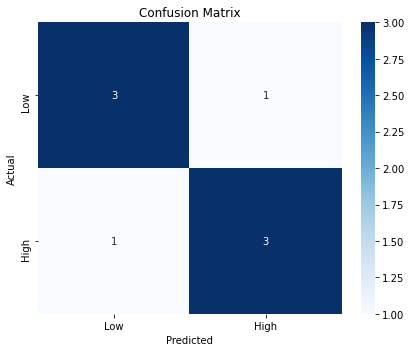

In [17]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## Step 4: ROC Curve and AUC
The ROC curve illustrates the model's ability to distinguish between classes. The closer the curve follows the top-left border, the better.

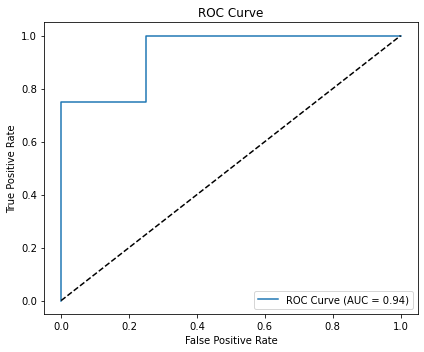

In [18]:
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Step 5: Key Metrics Summary
We summarize the key metrics: Accuracy, F1 Score, and ROC AUC.

In [19]:
metrics_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'ROC AUC'],
    'Value': [accuracy_score(y_true, y_pred), f1_score(y_true, y_pred), roc_auc]
})
metrics_summary.round(3)

,Metric,Value
0,Accuracy,0.750
1,F1 Score,0.750
2,ROC AUC,0.938


## Step 6: Business Fit and Trust Considerations
Based on the evaluation:
- Accuracy and AUC indicate moderate predictive strength.
- Confusion matrix shows reasonable balance but may need tuning if cost of false negatives is high.
- LIME and SHAP tools previously used improve model transparency and explainability.

**Next Actions:**
- Review class distribution and possibly oversample.
- Explore ensembling or threshold adjustment.
- Validate with domain stakeholders for decision support.